Accuracy is: 0.9826815642458101


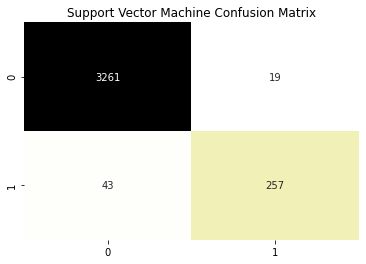

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import warnings
import matplotlib.pyplot as plt    # basic plotting library
import seaborn as sns  
warnings.filterwarnings("ignore")

DataFrame = pd.read_csv("pulsar_stars.csv")  
DataFrame.head()

labels = DataFrame.target_class.values
DataFrame.drop(["target_class"],axis=1,inplace=True)
features = DataFrame.values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
features_scaled = scaler.fit_transform(features)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_scaled,labels,test_size=0.2)

from sklearn.svm import SVC
svm_model = SVC(random_state=42,C=250,gamma=1.6,kernel="poly",probability=True)
svm_model.fit(x_train,y_train)
y_head_svm = svm_model.predict(x_test)
svm_score = svm_model.score(x_test,y_test)

from sklearn.metrics import confusion_matrix, accuracy_score
print("Accuracy is:", accuracy_score(y_head_svm, y_test))
cm_svm = confusion_matrix(y_test,y_head_svm)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,cbar=False,annot=True,cmap="CMRmap_r",fmt="d")